In [1]:
import os
import time
import re
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# PFT : Temperate/boreal deciduous broadleaf forest
PFT = 3
# COVER: Secondary forest
COVER = 1
POOL_NUM = 7

In [2]:
from coordinatesDict import coordinatesDict
time1 = time.time()

data_04_path = "../../data/1500-2004"
input_coordinate = (50.25, 10.25)
start_year = 1873
end_year = 1973
grid_size = 0.5

coordinates = coordinatesDict(data_04_path, start_year, end_year, input_coordinate, grid_size)

time2 = time.time()
print(time2-time1)

waktu membaca states dari file: 55.331786155700684
waktu membaca pft: 5.941347122192383
waktu membaca transition: 0.22133874893188477
62.15749764442444


In [3]:
coordinates['lat5025lon1025'].run()

In [4]:
years = np.arange(0, 101)

# Kode Lama

In [10]:
from coordinatesDict import coordinatesDict
time1 = time.time()

data_04_path = "../../data/1500-2004"
input_coordinate = (50.25, 10.25)
start_year = 1873
end_year = 1973
grid_size = 0.5

coordinates = coordinatesDict(data_04_path, start_year, end_year, input_coordinate, grid_size)

time2 = time.time()
print(time2-time1)
coordinates['lat5025lon1025'].run()

waktu membaca states dari file: 68.45405530929565
waktu membaca pft: 3.6255195140838623
waktu membaca transition: 0.0050008296966552734
72.30770516395569


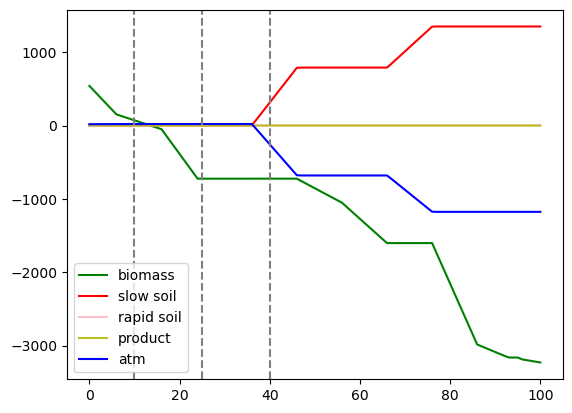

In [11]:
carbonPools = dict()
pools = ['biomass', 'slow soil', 'rapid soil', 'product', 'product 10', 'product 100', 'atm']
colors = ['green', 'red', 'pink', 'tab:olive', 'tab:olive','tab:olive', 'blue']
fig, ax = plt.subplots()
for pool_idx in range(POOL_NUM):
#     carbonPools[pools[pool_idx]] = 
    if (pool_idx == 4) or (pool_idx == 5):
        pass
    else:
        ax.plot(years, carbonOverTheYears(coordinates, 'lat5025lon1025', pool_idx, COVER, PFT), label=pools[pool_idx], c=colors[pool_idx])
plt.axvline(x=10, color='grey', linestyle='--')
plt.axvline(x=25, color='grey', linestyle='--')
plt.axvline(x=40, color='grey', linestyle='--')
plt.legend()
plt.show()

In [6]:
def carbonOverTheYears(coorDict, coor, pool, cover, pft):
    if pool < 2:
        return coorDict[coor].carbonEqu[:, pool, cover, pft] + coorDict[coor].carbonExcess[:, pool, cover, :, pft].sum(axis=1)
    elif pool == 3:
        return coorDict[coor].carbonExcess[:, pool:pool+3, cover, :, pft].sum(axis=1).sum(axis=1)
    
    else:
        return coorDict[coor].carbonExcess[:, pool, cover, :, pft].sum(axis=1)

# Kode Baru

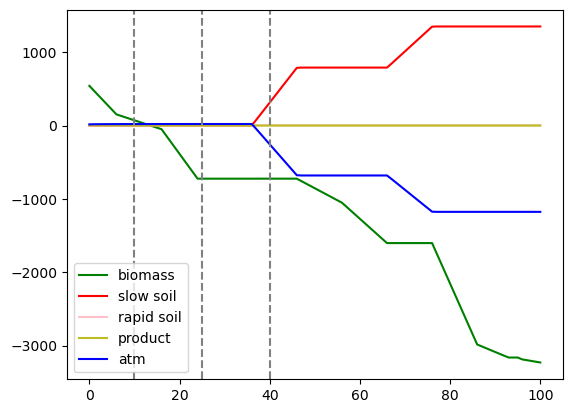

In [10]:
carbonPools = dict()
pools = ['biomass', 'slow soil', 'rapid soil', 'product', 'product 10', 'product 100', 'atm']
colors = ['green', 'red', 'pink', 'tab:olive', 'tab:olive','tab:olive', 'blue']
fig, ax = plt.subplots()
for pool_idx in range(POOL_NUM):
#     carbonPools[pools[pool_idx]] = 
    if (pool_idx == 4) or (pool_idx == 5):
        pass
    else:
        ax.plot(years, carbonOverTheYears(coordinates, 'lat5025lon1025', pool_idx, COVER, PFT), label=pools[pool_idx], c=colors[pool_idx])
plt.axvline(x=10, color='grey', linestyle='--')
plt.axvline(x=25, color='grey', linestyle='--')
plt.axvline(x=40, color='grey', linestyle='--')
plt.legend()
plt.savefig("grafik_kode_2.png")
plt.show()

In [9]:
os.getcwd()

'C:\\Users\\Khalid\\Desktop\\Riset data\\LUHa\\LULCC\\utils'

In [26]:
lat_coordinates = np.linspace(89.75, -89.75, 360)
lon_coordinates = np.linspace(-179.75, 179.75, 720)

In [30]:
np.where(lat_coordinates == -55.25)

(array([290], dtype=int64),)

In [32]:
np.where(lon_coordinates == -105.25)

(array([149], dtype=int64),)

In [5]:
np.loadtxt('../../data/cellarea_halfdeg.txt').shape

(360, 720)

In [ ]:
data_path = "../../data/1500-2004"
filenames = ["lat50.25lon10.25.lu", "lat50.25lon9.75.lu", "lat49.75lon10.25.lu", "lat49.75lon9.75.lu"]
transitions = dict()
for filename in filenames:
    string = re.sub("(\.|lu)", "",filename)
    transitions[f"{re.sub('-', '_', string)}"] = pd.read_csv(f"{data_path}/lu/{filename}", sep=' ', usecols=['year','f_sbh', 'f_sbh2', 'f_sbh3','sc','cs'])
    transitions[f"{re.sub('-', '_', string)}"].set_index('year', inplace=True)

<AxesSubplot: xlabel='year'>

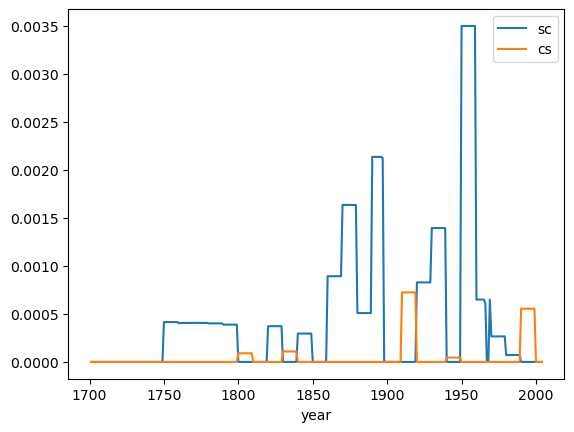

In [102]:
trans = transitions['lat5025lon1025']
trans.loc[1701:, :].plot()

In [40]:
data_path = "../../data/1500-2004"
filename = "lat50.25lon10.25.lu"
transition_columns =  np.array([13,15,17,19,21])
start_year = 1700
end_year = 2004
ZEROTH_IDX_YEAR = 1500

transition = np.loadtxt(f"{data_path}/lu/{filename}", skiprows=1, usecols=transition_columns)[(start_year-ZEROTH_IDX_YEAR):(end_year-ZEROTH_IDX_YEAR+1),:]

In [44]:
transition[transition > 0.1]

array([], dtype=float64)

In [52]:
transition > 0.05.sum()

1

In [105]:
coordinates['lat5025lon1025'].transition_fraction.shape

(101, 4, 4)

In [ ]:
pd.read_csv